In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#path
path = r"C:\Users\JocGa\Instacart Basket Analysis"

In [3]:
#import dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_update2.pkl'))

# Bar Chart

<AxesSubplot:>

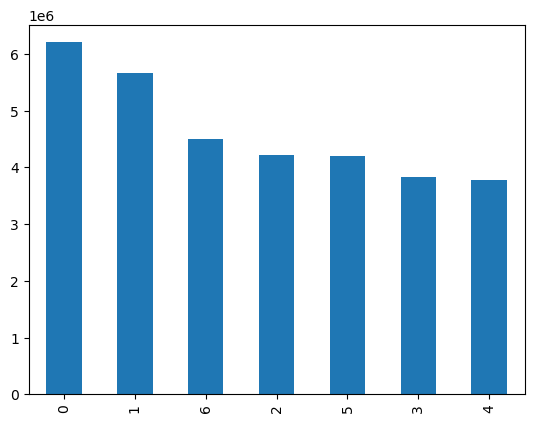

In [4]:
#bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

#observations are ordered from largest to smallest; Easier to view that (0) Sat has the highest count and (4) the lowest count

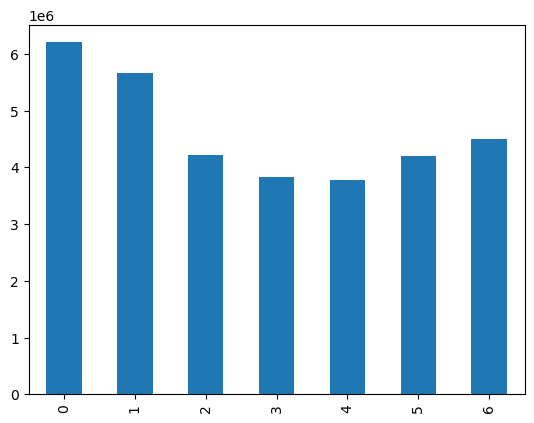

In [5]:
#sorting by index
bar2 = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

#observations are ordered by index; while the numbers stay the same, the order in which they appear has changed.

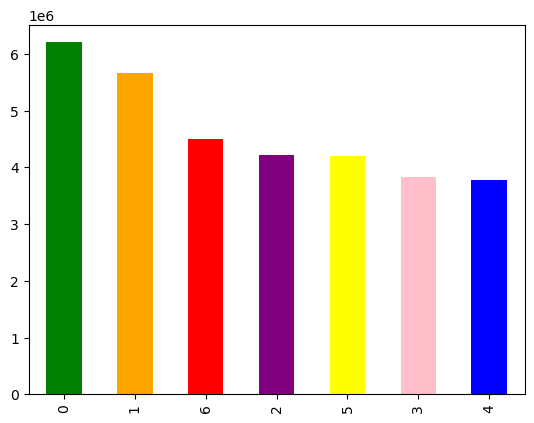

In [6]:
#adding color to chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['green', 'orange', 'red', 'purple', 'yellow', 'pink', 'blue'])

#observations are ordered by index color was added to day of the week

# Histograms and Scatterplots

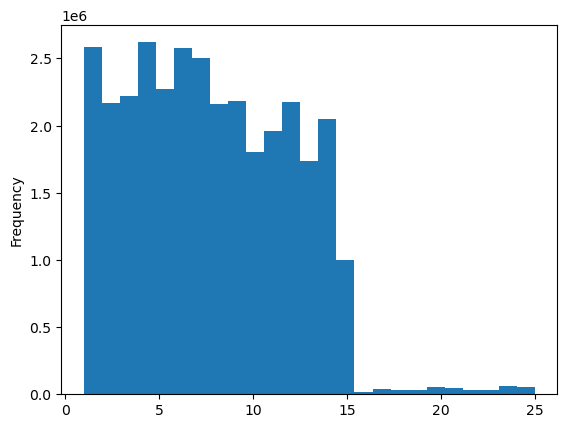

In [7]:
#creating histogram
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

#most products are between $1 and $15, while a few are higher priced at $15 to $25

<AxesSubplot:xlabel='prices', ylabel='prices'>

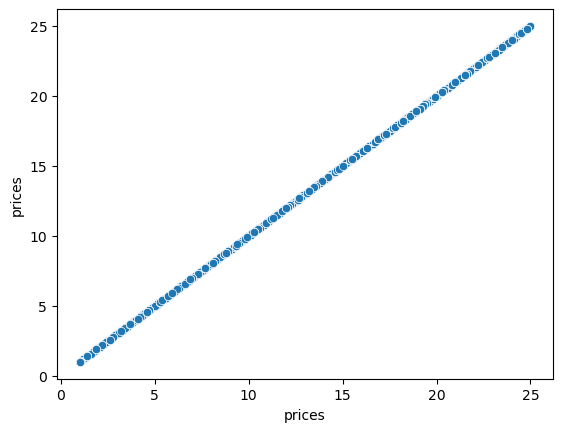

In [8]:
#creating an scatterplot checking for outliers
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

#observation no outliers

In [9]:
#exploratory checks
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_prior_orders,order_frequency_flag


#obersvation no price over 100

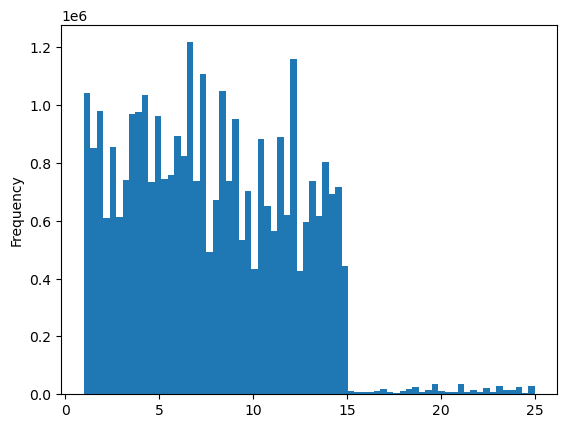

In [10]:
#creating histogram
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

#most products are between $1 and $15, while a few are higher priced at $15 to $25, bins 70

# Line Chart with Sampling Data

In [11]:
#creating a list holding true/false values to the test np.random.rant() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [12]:
#stores your boolean values
dev

array([False,  True, False, ...,  True,  True,  True])

In [13]:
#store 70% of the sample in the dataframe big
big = ords_prods_merge[dev]

In [14]:
#store 30% of the sample in the dataframe small
small = ords_prods_merge[~dev]

In [15]:
#check subsets
len(ords_prods_merge)

32404859

In [16]:
len(big) + len(small)

32404859

In [17]:
#contains only the 'price' and 'orders_day_of_week' columns from your small subset
df_2 = small[['orders_day_of_week', 'prices']]

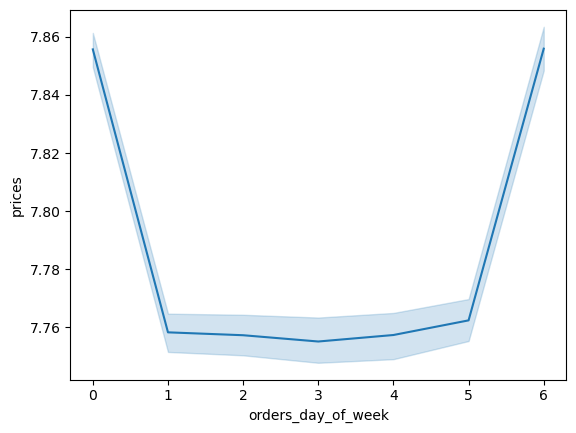

In [18]:
#create your line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

#the peaks on days zero and five mean that most money is spent on Saturday and Sunday

In [19]:
#compare the line chart of your subset to the entire dataframe
df_4 = ords_prods_merge[['orders_day_of_week','prices']]